# Clasificador paisajes
Para este ejercicio vas a crear un clasificador automático de paisajes. Los datos los encontrarás en el Classroom como `seg_train.zip` y `seg_test.zip`. Se pide:
1. Cargar las imágenes. Mira cómo están almacenados los datos. Tendrás que recorrer las carpetas, cargar las imágenes en memoria y etiquetarlas con los nombres de las carpetas. Realiza un reshape de cada imagen (comienza el ejercicio con 32x32, para ir más rápido en las ejecuciones).
2. Investiga las imágenes, comprueba con algunas muestras que has cargado bien los datos.
3. Normaliza
4. Diseña la arquitectura de la red. Recuerda que es un algoritmo de clasificación. Ojo con las dimensiones de la entrada
5. Reserva un 20% de los datos del entrenamiento para validar.
6. Representa el objeto history
7. Evalua el modelo con los datos de test
8. Representa algunos de los paisajes donde el modelo comete errores
9. Crea una matriz de confusión con los errores del modelo

**NOTA apartado 1**: para el apartado 1 tendras que recorre las carpetas/imagenes con `os.listdir()`, e ir cargando todas las imagenes como arrays de numpy

**NOTA apartado 4**: empieza con un par de capas Conv2D + MaxPooling2D con activación relu y después la fully connected layer. on softmax como ultima capa

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tensorflow import keras
import cv2
from skimage.io import imread
from sklearn.metrics import confusion_matrix

In [3]:
class_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
class_names_label

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [5]:
os.getcwd() + "\\data\\seg_train"

'd:\\Carpeta_profesor\\2309_dsft_thebridge\\3-Machine_Learning\\4-Deep_Learning\\2-Redes_Convolucionales\\ejercicios\\data\\seg_train'

In [7]:
os.listdir()

['Clasificador_paisajes.ipynb', 'data']

In [6]:
IMAGE_SIZE = (32,32)
TRAIN_PATH = os.getcwd() + "\\data\\seg_train"
TEST_PATH = os.getcwd() + "\\data\\seg_test"

In [8]:
def read_data(path, im_size):
    X = []
    y = []

    for folder in os.listdir(path):
        label = class_names_label[folder]
        folder_path = os.path.join(path, folder)

        for file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, file)
            image = imread(image_path)
            smallimage = cv2.resize(image, im_size)

            X.append(smallimage)
            y.append(label)
    
    return np.array(X), np.array(y)

In [9]:
X_train, y_train = read_data(TRAIN_PATH, IMAGE_SIZE)
X_test, y_test = read_data(TEST_PATH, IMAGE_SIZE)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14034, 32, 32, 3)
(3000, 32, 32, 3)
(14034,)
(3000,)


In [10]:
pd.Series(y_train).value_counts(normalize=True)

3    0.178994
2    0.171298
5    0.169731
4    0.162035
1    0.161821
0    0.156121
dtype: float64

In [11]:
pd.Series(y_test).value_counts(normalize=True)

2    0.184333
3    0.175000
4    0.170000
5    0.167000
1    0.158000
0    0.145667
dtype: float64

In [13]:
y_train[0:200]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [14]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train, random_state=10)
X_test, y_test = shuffle(X_test, y_test, random_state=10)

In [15]:
y_train[0:200]

array([0, 2, 5, 5, 2, 1, 3, 4, 0, 5, 5, 4, 1, 5, 4, 3, 4, 4, 0, 2, 3, 0,
       2, 5, 2, 3, 5, 5, 4, 4, 1, 2, 4, 3, 5, 4, 3, 1, 1, 3, 4, 5, 2, 4,
       0, 5, 4, 4, 4, 0, 5, 2, 2, 3, 3, 4, 0, 1, 2, 3, 3, 2, 5, 4, 1, 3,
       5, 0, 3, 0, 5, 4, 1, 1, 3, 0, 5, 2, 3, 5, 4, 2, 0, 4, 3, 3, 2, 0,
       4, 2, 0, 3, 4, 2, 2, 2, 0, 5, 2, 0, 5, 5, 2, 3, 4, 5, 0, 3, 0, 4,
       0, 0, 3, 0, 4, 0, 3, 2, 3, 3, 5, 5, 2, 2, 0, 0, 3, 3, 3, 5, 3, 1,
       3, 0, 3, 3, 3, 1, 0, 2, 0, 0, 4, 5, 2, 5, 3, 5, 1, 4, 5, 2, 2, 4,
       2, 0, 2, 2, 4, 1, 5, 1, 5, 1, 3, 4, 3, 5, 2, 4, 1, 0, 3, 4, 2, 0,
       4, 5, 2, 2, 3, 5, 4, 5, 2, 2, 4, 4, 1, 1, 4, 5, 1, 0, 0, 2, 2, 3,
       2, 3])

In [16]:
X_train.shape[0]

14034

forest


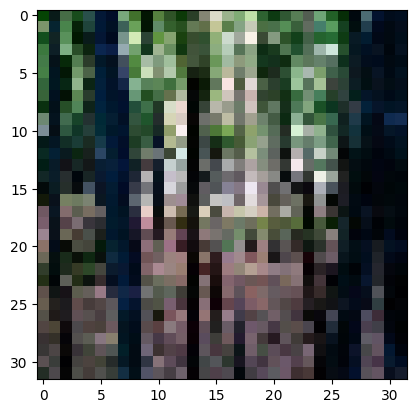

In [27]:
index = np.random.randint(X_train.shape[0])
print(class_names[y_train[index]])
plt.imshow(X_train[index])

In [37]:
X_train

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [215, 222, 228],
         [213, 218, 226],
         [144, 148, 152]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [106, 112, 109],
         [114, 116, 112],
         [100, 102,  98]],

        [[254, 254, 254],
         [254, 254, 254],
         [255, 255, 255],
         ...,
         [108, 121, 130],
         [117, 126, 130],
         [109, 117, 122]],

        ...,

        [[ 56,  63,  68],
         [ 50,  58,  69],
         [ 53,  61,  67],
         ...,
         [ 84,  89,  95],
         [ 78,  81,  87],
         [ 72,  77,  82]],

        [[ 57,  67,  67],
         [ 50,  64,  67],
         [ 58,  69,  73],
         ...,
         [ 30,  34,  38],
         [ 46,  48,  51],
         [ 42,  48,  49]],

        [[ 91,  76,  73],
         [ 97,  92,  67],
         [115, 122, 104],
         ...,
         [ 40,  45,  48],
        

In [36]:
X_train[0][0][0][0]

255

In [38]:
print(X_train.min())
print(X_train.max())

0
255


In [39]:
X_train = X_train/255
X_test = X_test/255

In [40]:
print(X_train.min())
print(X_train.max())

0.0
1.0


In [41]:
X_train.shape

(14034, 32, 32, 3)

In [43]:
model = keras.Sequential([
    keras.layers.Conv2D(64, (3,3), activation="relu", input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(32, (3,3), activation="relu"),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(6, activation="softmax")
])

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1152)              0         
                                                                 
 dense_3 (Dense)             (None, 64)               

In [46]:
64 * (3*3)*3 + 64

1792

In [47]:
32*(3*3)*64 + 32

18464

In [49]:
1152*64 + 64

73792

In [51]:
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [52]:
history = model.fit(X_train, y_train, batch_size=128, epochs=20, validation_split=0.2)

Epoch 1/20


88/88 [==============================] - 15s 135ms/step - loss: 1.3521 - accuracy: 0.4765 - val_loss: 1.1092 - val_accuracy: 0.5682
Epoch 2/20
88/88 [==============================] - 12s 142ms/step - loss: 1.0327 - accuracy: 0.5993 - val_loss: 1.0017 - val_accuracy: 0.6099
Epoch 3/20
88/88 [==============================] - 11s 120ms/step - loss: 0.9162 - accuracy: 0.6488 - val_loss: 0.9296 - val_accuracy: 0.6437
Epoch 4/20
88/88 [==============================] - 12s 132ms/step - loss: 0.8472 - accuracy: 0.6787 - val_loss: 0.8495 - val_accuracy: 0.6854
Epoch 5/20
88/88 [==============================] - 11s 121ms/step - loss: 0.7956 - accuracy: 0.7064 - val_loss: 0.8602 - val_accuracy: 0.6804
Epoch 6/20
88/88 [==============================] - 12s 135ms/step - loss: 0.7600 - accuracy: 0.7178 - val_loss: 0.8097 - val_accuracy: 0.7086
Epoch 7/20
88/88 [==============================] - 12s 133ms/step - loss: 0.7084 - accuracy: 0.7420 - val_loss: 0.7352 - val_accuracy: 0.73

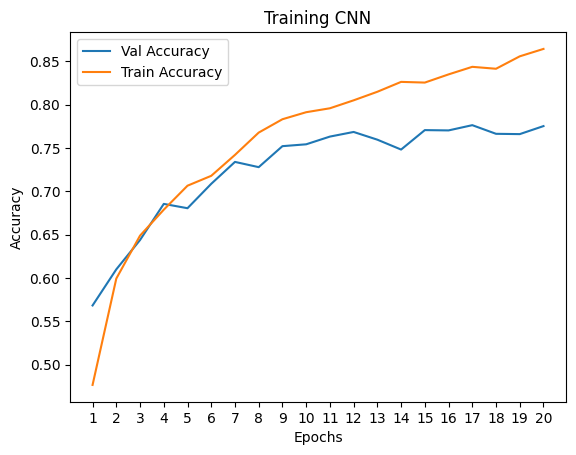

In [61]:
df_hist = pd.DataFrame(history.history, index=np.arange(1,21))

plt.plot(df_hist['val_accuracy'], label="Val Accuracy")
plt.plot(df_hist['accuracy'], label="Train Accuracy")
plt.title("Training CNN")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(range(1,21))
plt.legend()

In [63]:
results = model.evaluate(X_test, y_test)
results

94/94 [==============================] - 1s 15ms/step - loss: 0.6629 - accuracy: 0.7777


[0.6628735065460205, 0.7776666879653931]

In [65]:
y_pred = model.predict(X_test)
y_pred.round(2)

94/94 [==============================] - 1s 13ms/step


array([[0.  , 0.  , 0.02, 0.97, 0.  , 0.  ],
       [0.45, 0.12, 0.01, 0.05, 0.  , 0.37],
       [0.  , 0.  , 0.39, 0.6 , 0.02, 0.  ],
       ...,
       [0.07, 0.  , 0.53, 0.14, 0.04, 0.22],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.31, 0.68, 0.01, 0.  ]], dtype=float32)

glacier


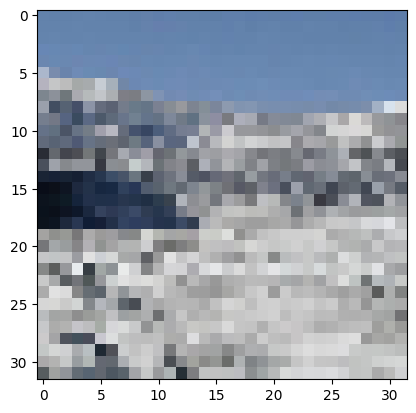

In [68]:
print(class_names[y_test[2]])
plt.imshow(X_test[2])

In [69]:
pred_labels = np.argmax(y_pred, axis=1)
pred_labels

array([3, 0, 3, ..., 2, 1, 3], dtype=int64)

In [70]:
label_pred = [class_names[pred] for pred in pred_labels]
label_pred

['mountain',
 'buildings',
 'mountain',
 'sea',
 'forest',
 'mountain',
 'street',
 'mountain',
 'sea',
 'street',
 'buildings',
 'sea',
 'sea',
 'buildings',
 'street',
 'sea',
 'glacier',
 'mountain',
 'glacier',
 'buildings',
 'buildings',
 'glacier',
 'street',
 'glacier',
 'sea',
 'glacier',
 'sea',
 'buildings',
 'forest',
 'forest',
 'mountain',
 'buildings',
 'glacier',
 'sea',
 'sea',
 'mountain',
 'street',
 'mountain',
 'sea',
 'forest',
 'forest',
 'buildings',
 'glacier',
 'street',
 'glacier',
 'mountain',
 'buildings',
 'mountain',
 'glacier',
 'glacier',
 'forest',
 'street',
 'mountain',
 'glacier',
 'glacier',
 'glacier',
 'forest',
 'sea',
 'glacier',
 'forest',
 'mountain',
 'glacier',
 'sea',
 'forest',
 'buildings',
 'buildings',
 'sea',
 'glacier',
 'mountain',
 'sea',
 'forest',
 'mountain',
 'mountain',
 'buildings',
 'glacier',
 'buildings',
 'street',
 'sea',
 'sea',
 'forest',
 'sea',
 'sea',
 'mountain',
 'street',
 'glacier',
 'street',
 'glacier',
 'glaci

<Axes: >

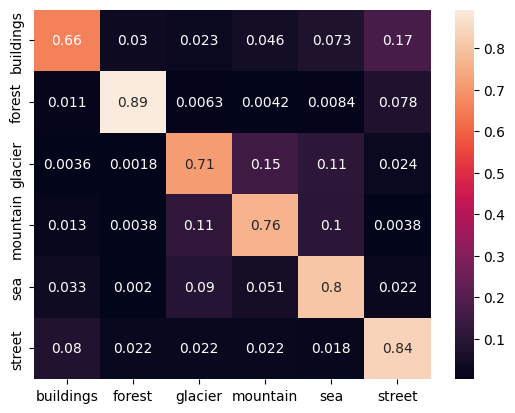

In [73]:
c_mat = confusion_matrix(y_test, pred_labels, normalize='true')
sns.heatmap(c_mat, annot=True, xticklabels=class_names, yticklabels=class_names)